# Pairplots
Showing some other potential features that could be helpful to model.

- AH - Air Humidity (0-100%) AKA Relative Humidity
- AT - Air Temperature (°C)
- BCOCF - Brine-Condensate Outlet Combined flow 
- CIT - Condenser Inlet Temperature
- COT - Condenser Outlet Temperature
- CP - Condenser Pressure (Outlet) bar
- KW - Parasitic load (kW)
- MW - Turbine power 
- NCGOT - Non-condensable gas outlet temperature - Preheater steam/brine in
- PHBOT - Preheater brine outlet temperature
- PHMFIT - Preheater motive fluid inlet temperature
- PHMFOT - Preheater motive fluid outlet temperature
- SD - Pump speed
- SIF - Steam inlet flow
- SIT - Steam inlet temperature
- TOT - Turbine outlet temperature
- VMFL - vaporizer motive fluid level
- VMFOT - vaporizer motive fluid outlet temperature
- VP - vaporizer pressure


![Flowsheet diagram](https://ars.els-cdn.com/content/image/1-s2.0-S0098135425002157-gr1_lrg.jpg)

In [3]:
import pickle
import pandas
import os
import torch
import seaborn as sns
import matplotlib.pyplot as plt



with open('../reconcile_all.pk1', 'rb') as f:
    data = pickle.load(f)

df = data[1000:9000]

print(df.columns)

Index(['VMFL', 'VP', 'MW', 'KW', 'AT', 'AH', 'SIT', 'SIF', 'CP', 'BCOCF',
       'COT', 'PHBOT', 'PHMFOT', 'VMFOT', 'NCGOT', 'SD', 'CIT', 'TOT', 'm_WF',
       'm_condensate', 'm_WF2', 'pump_power', 'PHMFIT'],
      dtype='object')


# Condenser Data

It seems like we actually have the most important properties related to the condenser, and we might be able to model everything - inlet temperature and air humidity seem to affect it a lot. The main thing I see missing is flow data - for the motive fluid and the air. Are they constant? Can we use the pump speed to determine the flow rate? (how much dynamic levels is there in the system)

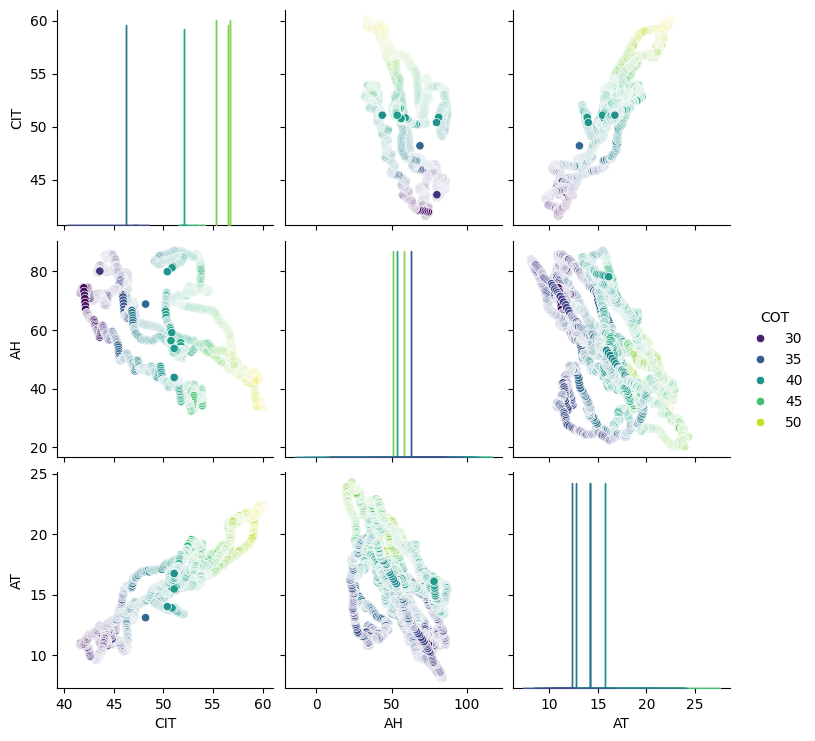

In [4]:
sns.pairplot(df[['CIT', 'AH', 'AT', 'COT']], hue='COT', palette='viridis')

# Pump - To do

Do we have an outlet temperature for the pump? 
Why is the pump speed 0 here?
Does the pump control the flow rate through the system?

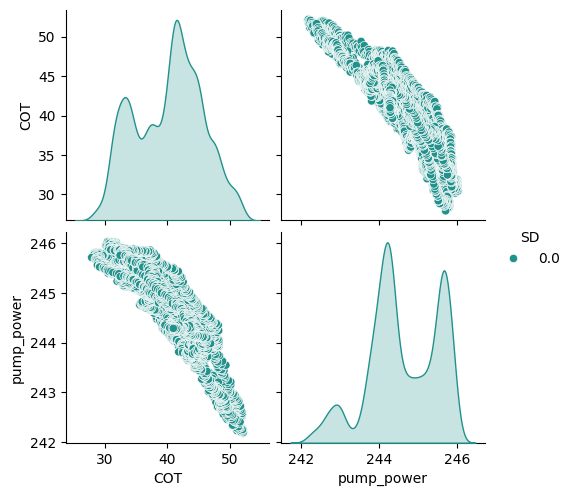

In [ ]:
# Pump inlet (condensor outlet) temperature, pump power, and pump speed
sns.pairplot(df[['COT', 'pump_power', 'SD']], hue='SD', palette='viridis')
# TODO: 

# Turbine

We have the inlet temperature of from the vaporiser outlet (turbine inlet), and the work. But those attributes are not enough to predict the turbine outlet temperature. 
What other properties do we need? (probably flow rate?)

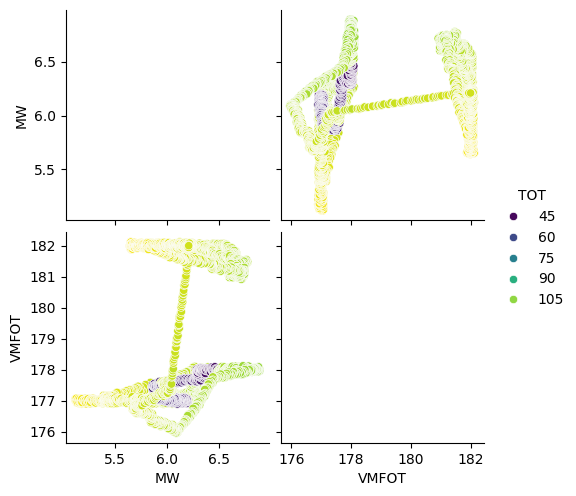

In [13]:
# VMFOT - vaporizer out, turbine inlet temp
# TOT - turbine outlet temp
# MW - Turbine power
sns.pairplot(df[[ 'MW', 'VMFOT', 'TOT']], hue='TOT', palette='viridis')

# Vaporizer

It looks like we do have all the properties I see as required - steam T, P, F, just maybe not motive fluid flow rate.
How does the motive fluid level affect things?

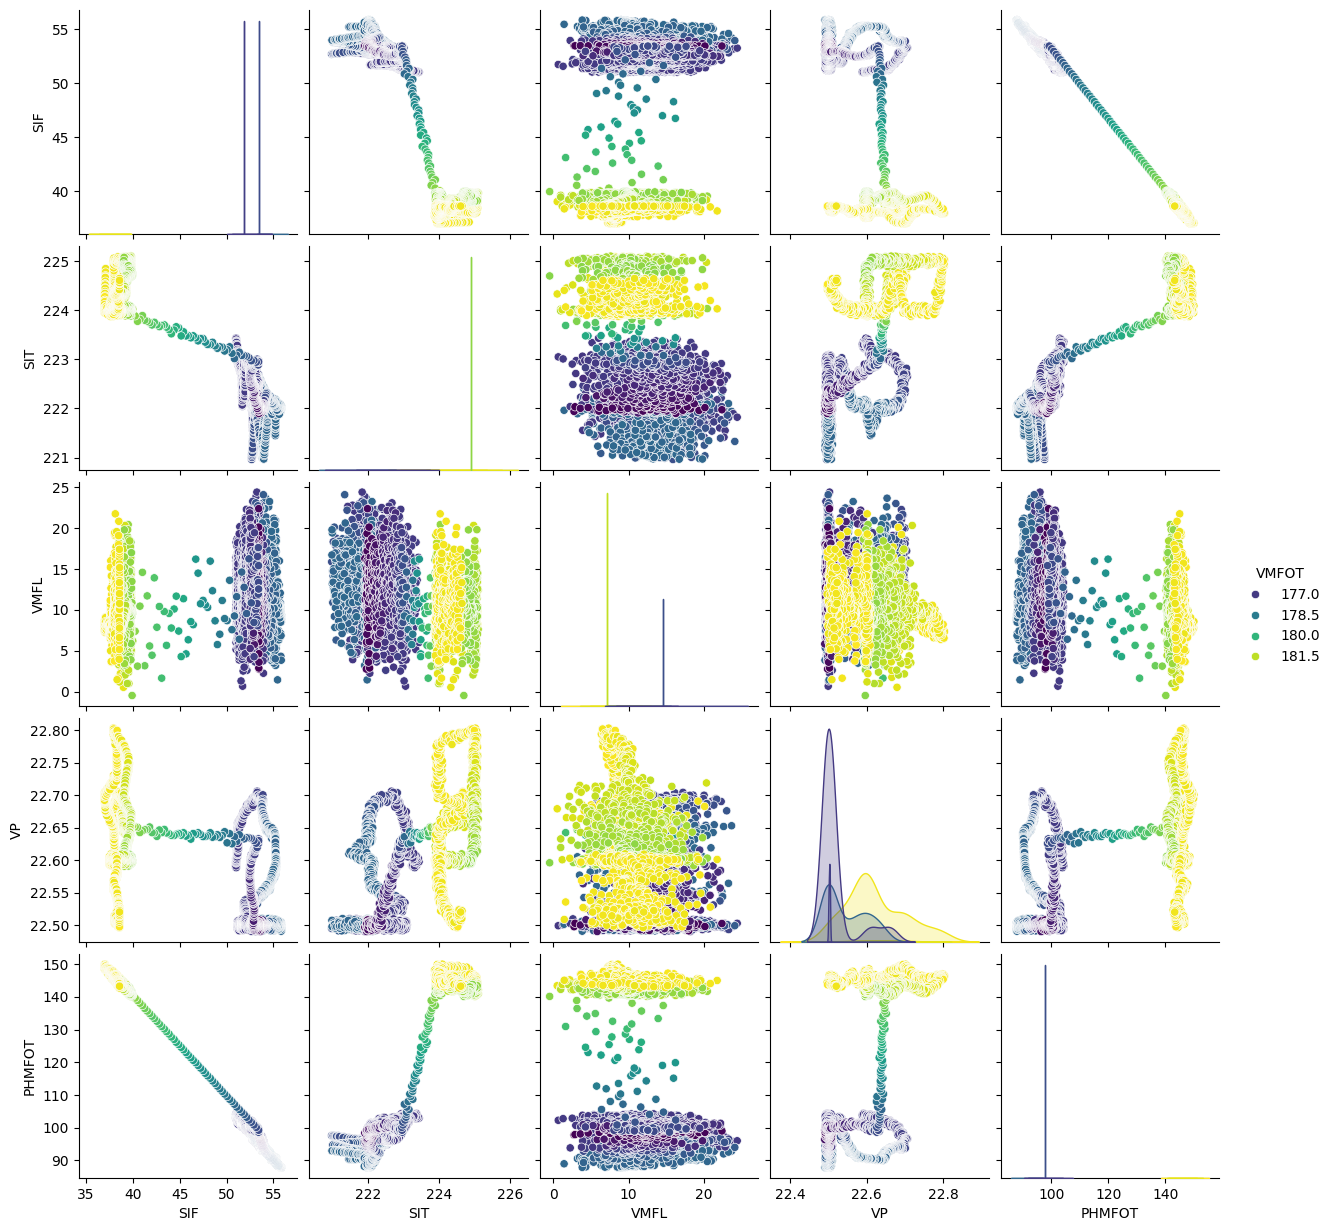

In [14]:
sns.pairplot(df[[ 'SIF', 'SIT', 'VMFL', 'VP','PHMFOT','VMFOT']], hue='VMFOT', palette='viridis')
# TODO: Can we get the temperature of the steam when it goes out of the vaporizer?


# Recuperator

Internal heat exchanger

Can we get the pump outlet temperature? or does that not change much from the condensor?

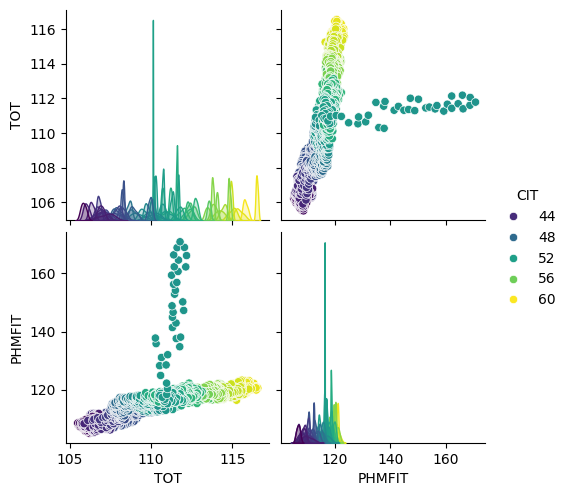

In [9]:
# 
sns.pairplot(df[[ 'TOT', 'PHMFIT', 'CIT']], hue='CIT', palette='viridis')

# Preheater

Am I missing a brine flow rate? I think we should have enough to model this too.

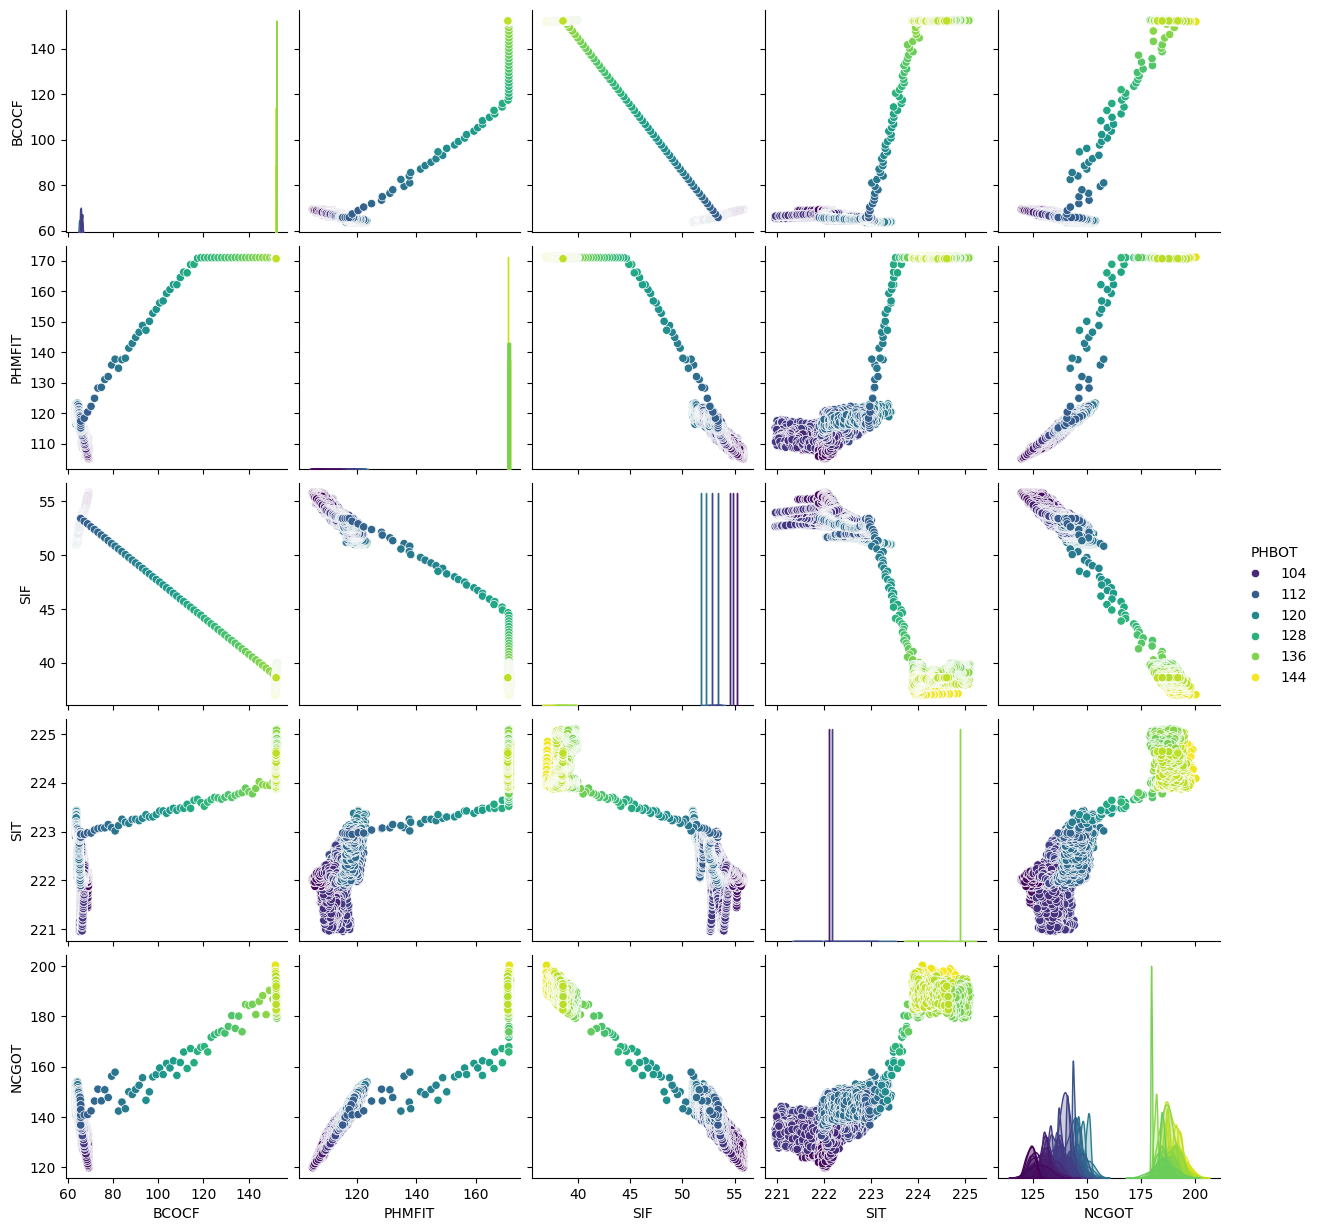

In [15]:
sns.pairplot(df[['BCOCF', 'PHMFIT', 'SIF','SIT', 'PHBOT','NCGOT']], hue='PHBOT', palette='viridis')